<a href="https://colab.research.google.com/github/vinayaka16041999/Data-Science-ML-Projects/blob/master/TSF_GRIP_DSBI_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

**Importing necessary libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

**Importing data**

In [8]:
df = pd.read_csv(r'/content/Iris.csv')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data = df.iloc[:,1:-1].values

**Plotting Elbow Graph to find optimum number of clusters**

In [16]:
inertias = []
for k in range(1,40):
  temp_model = KMeans(n_clusters=k)
  temp_model.fit(data)
  inertias.append(temp_model.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

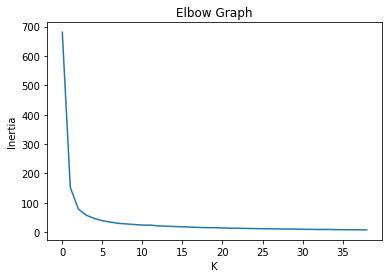

In [19]:
plt.plot(inertias)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Graph")

In [28]:
print("Optimum K is k=3(Where the graph has highest descent")

Optimum K is k=3(Where the graph has highest descent


**Training the model with optimum number of clusters**

In [29]:
model = KMeans(n_clusters=3, init='k-means++',random_state=0)
model.fit(data)
df['PredictedLabels'] = model.labels_

**Visual representation of clusters**

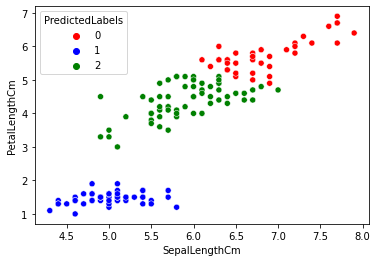

In [35]:
sb.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='PredictedLabels',palette=["red","blue","green"])

# Using Hierarchical Clustering

**Importing necessary libraries**

In [43]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

**Creating a dendrogram to find the optimum number of clusters**

Text(0, 0.5, 'Euclidean distances')

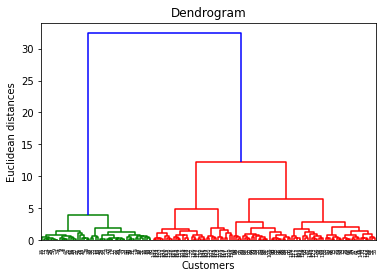

In [41]:
dend = dendrogram(linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [42]:
print("Ideal number of clusters according to Dendrogram is 2")

Ideal number of clusters according to Dendrogram is 2


**Training the Hierarchical model with optimum number of clusters found from Dendrogram & Visualizing it**

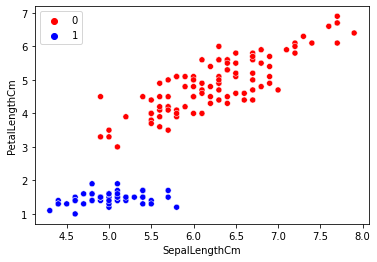

In [45]:
model2 = AgglomerativeClustering(n_clusters=2)
model2.fit(data)
sb.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue=model2.labels_,palette=["red","blue"])